In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [2]:
dct = {
    'weight' : [2, 4, 5, 3, 6, 5, 7],
    'price' : [35, 60, 20, 50, 50, 55, 60]
}

In [3]:
dct

{'weight': [2, 4, 5, 3, 6, 5, 7], 'price': [35, 60, 20, 50, 50, 55, 60]}

In [4]:
df = pd.DataFrame(dct)

In [5]:
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [6]:
df.to_excel('workfile.xlsx', index = False)

# *Linear Regression using formula*

In [7]:
df = pd.read_excel('workfile.xlsx')

In [8]:
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [9]:
df.shape

(7, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  7 non-null      int64
 1   price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [11]:
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


Text(0.5, 1.0, 'Weight vs Price Diagram')

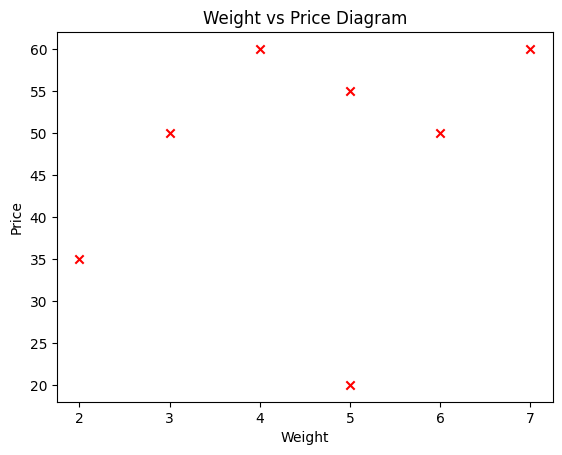

In [12]:
plt.scatter(df.weight, df.price, color = 'Red',  marker = 'x')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price Diagram')

In [13]:
x = df.weight

In [14]:
y = df.price

In [15]:
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: weight, dtype: int64

In [16]:
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: price, dtype: int64

In [17]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [18]:
x_mean

np.float64(4.571428571428571)

In [19]:
y_mean

np.float64(47.142857142857146)

In [20]:
dev_x = x - x_mean
dev_y = y - y_mean

In [21]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: weight, dtype: float64

In [22]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: price, dtype: float64

In [23]:
upper_value = np.sum(dev_x * dev_y)
lower_value = np.sum(dev_x ** 2)

In [24]:
m = upper_value / lower_value

In [25]:
c = y_mean - (m * x_mean)

In [26]:
m

np.float64(2.620967741935484)

In [27]:
c

np.float64(35.16129032258065)

In [28]:
val = float(input())
print(m * val + c)

 6.5


52.197580645161295


# *Linear Regression using sklearn*

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(df[['weight']], df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
reg.predict([[6.5]])

C:\Users\Maruf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.19758065])

In [33]:
reg.coef_

array([2.62096774])

In [34]:
reg.intercept_

np.float64(35.16129032258065)

# *Best Fit Line*

C:\Users\Maruf\AppData\Local\Temp\ipykernel_4356\1624739617.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eqn = f"y = {float(m):.2f}x + {float(c):.2f}"


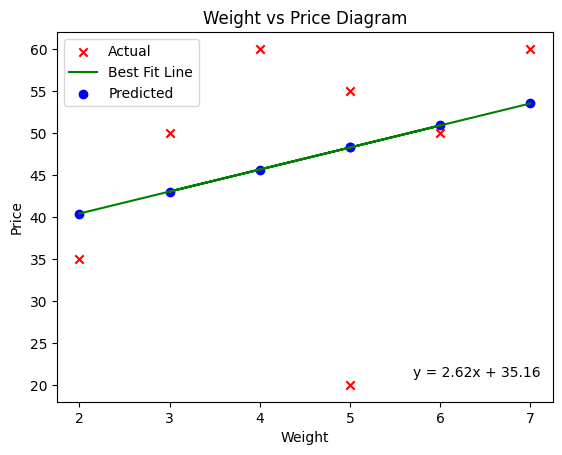

In [35]:
m = reg.coef_
c = reg.intercept_
eqn = f"y = {float(m):.2f}x + {float(c):.2f}"

plt.text(max(df['weight']) - 1.3, min(df['price']) + 1, eqn)

plt.scatter(df.weight, df.price, color = 'Red',  marker = 'x', label = 'Actual')
plt.plot(df[['weight']], reg.predict(df[['weight']]), color = 'Green', label = 'Best Fit Line')
plt.scatter(df[['weight']], reg.predict(df[['weight']]), color = 'Blue', marker = 'o', label = 'Predicted')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price Diagram')

plt.legend()
plt.show()